# Problem Statement:

The objective of this project was to segment customers based on their annual income and spending score using K-Means clustering. The challenge involved identifying distinct groups of customers to tailor marketing strategies effectively, thereby enhancing customer satisfaction and business growth.

# Import libraries

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

# Data preprocessing

In [16]:
#Reading data
data=pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [17]:
#checking shape of data set
data.shape

(200, 5)

In [18]:
#fetching all information of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [19]:
#checking for null values
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [20]:
#retriving only required columns(here annual income and spending score)
x=data.iloc[:,[3,4]].values
print(x)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

# Model fitting

In [21]:
# calculating and storing within cluster sum of square (wcss)
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

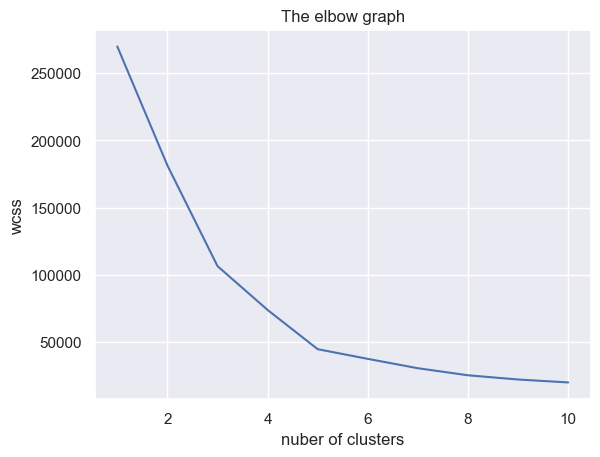

In [22]:
#ploting wcss
sns.set()
plt.plot(range(1,11),wcss)
plt.title('The elbow graph')
plt.xlabel('nuber of clusters')
plt.ylabel('wcss')
plt.show()

Here we can see that there is no significant large drop between cluster 5 to 6 

Thus we conclude that 5 clusters are enough to split the data

In [23]:
#model fitting and values prediction
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=0)
y=kmeans.fit_predict(x)
print(y)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


Text(0, 0.5, 'Spending score')

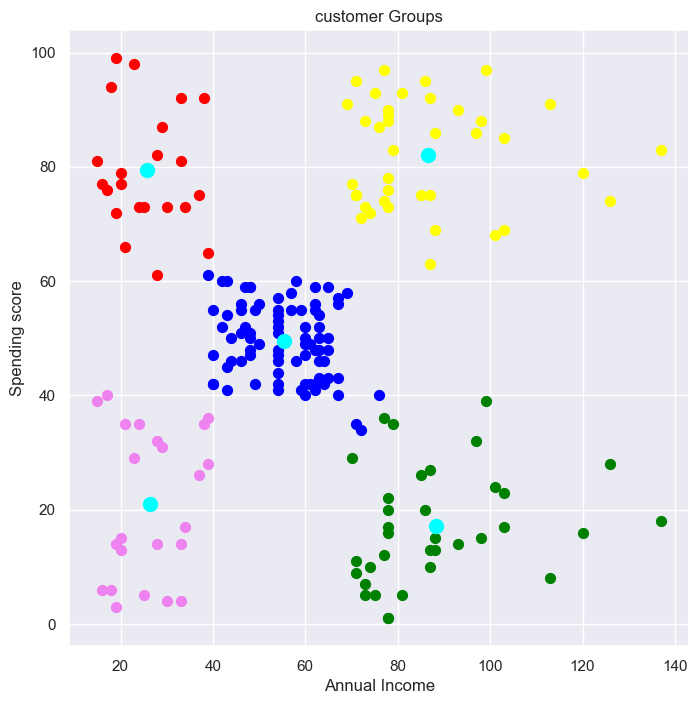

In [24]:
#ploting clusters 
plt.figure(figsize=(8,8))
plt.scatter(x[y==0,0],x[y==0,1],s=50,c='green',label='cluster 1')
plt.scatter(x[y==1,0],x[y==1,1],s=50,c='blue',label='cluster 2')
plt.scatter(x[y==2,0],x[y==2,1],s=50,c='yellow',label='cluster 3')
plt.scatter(x[y==3,0],x[y==3,1],s=50,c='red',label='cluster 4')
plt.scatter(x[y==4,0],x[y==4,1],s=50,c='violet',label='cluster 5')
#finding center of cluster
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='cyan',label='centrods')
plt.title('customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending score')

After observing the above graph we can conclude that:

Green cluster:- these customers have more income but they will spend less time in shoping, we can offer products and discount to these peoples to attract

yellow cluster:- they have more income and they have do more shope,we can provide more discounts on product

Blue cluster:- they have average income and also they will spend average time on shoping

violet cluster:-they have less income and they will spend less time on shoping

Red cluster:- they have less income but they will spend more time on shoping

# Solution Description:

To address the problem, the following steps were undertaken:

Data Preprocessing: The dataset was read and preprocessed by selecting relevant features, specifically annual income and spending score.
Elbow Method for Optimal Clusters: The Elbow Method was applied to determine the optimal number of clusters, which was found to be 5 based on the within-cluster sum of squares (WCSS).
K-Means Clustering: The K-Means algorithm was implemented to segment the customers into 5 distinct clusters.
Visualization: The clusters were visualized, and each cluster was analyzed to understand the characteristics of the customers within them, such as spending habits and income levels.